<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/Losses_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOSSES and METRICS:

Loss functions and metrics are both important concepts in machine learning, but they serve different purposes.

* **Loss functions** are used to evaluate how well a machine learning model is performing during training. They are mathematical functions that measure the difference between the model's predictions and the actual target values. The goal of training is to minimize the loss function, which means making the model's predictions as close to the actual target values as possible.

* **Metrics** are used to evaluate how well a machine learning model is performing on new, unseen data. They are not used to guide the training process, but rather to provide a holistic assessment of the model's performance. Common metrics include accuracy, precision, recall, and F1-score.


Here is a table summarizing the key differences between loss functions and metrics:

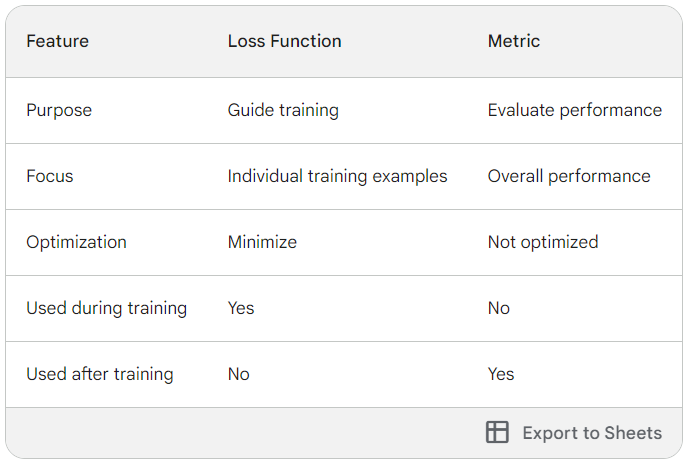

In some cases, the same function can be used as both a loss function and a metric. For example, the mean squared error (MSE) is a common loss function for regression tasks, but it can also be used as a metric to evaluate the performance of a regression model.

Here is an example of how loss functions and metrics are used in practice:

**Suppose you are training a machine learning model to classify images as being of cats or dogs. You use the cross-entropy loss function to guide the training process, and you use the accuracy metric to evaluate the performance of the model on a validation set. The cross-entropy loss function will help you to identify training examples that the model is not doing well on, so that you can adjust the model's parameters. The accuracy metric will give you a more general sense of how well the model is doing on the validation set.**

In conclusion, loss functions and metrics are both important tools for evaluating the performance of machine learning models. Loss functions are used during training to guide the optimization process, while metrics are used after training to assess the model's performance on new data.

MATERIAL: [LINK](https://keras.io/api/losses/)
[LINK](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

## 1.0 **Regression Metrics and Losses**

#### **MSE**
The mean squared error (MSE) is a loss function that measures the average squared difference between the predicted values and the actual target values. It is a widely used loss function in machine learning, particularly for regression tasks.

MSE is calculated as the sum of the squared differences between the predicted values and the actual target values, divided by the number of examples. The formula for MSE is:

MSE = Σ(predicted value - actual value)^2 / n

#### **RMSE**

Root mean squared error (RMSE) is a loss function that is closely related to the mean squared error (MSE). While MSE measures the average squared difference between predicted values and actual target values, RMSE takes the square root of the MSE to obtain a scale-invariant metric. This means that RMSE is expressed in the same units as the target variable, making it easier to interpret and compare results across different datasets.

The formula for RMSE is:

RMSE = √(MSE)

where:

* RMSE is the root mean squared error
* MSE is the mean squared error

RMSE is a common choice for evaluating regression models because it penalizes larger errors more heavily than smaller errors. This is because squaring the difference between the predicted value and the actual value amplifies larger errors, causing them to have a greater impact on the overall loss.

#### **MAE**

The mean absolute error (MAE) is a loss function that measures the average absolute difference between the predicted values and the actual target values. It is a popular loss function for regression tasks, particularly when dealing with data that may contain outliers. Unlike the mean squared error (MSE), which is sensitive to outliers, MAE is less affected by extreme values, making it a robust choice for such scenarios.

MAE is calculated by taking the absolute difference between each predicted value and its corresponding actual value, then averaging these absolute differences over the entire dataset. The formula for MAE is:

$
\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.
$

where:

* Σ represents summation
* predicted value is the predicted value for a single example
* actual value is the actual target value for a single example
* n is the number of examples

MAE provides a straightforward interpretation as the average "distance" between the predicted values and the actual values. It penalizes both positive and negative errors equally, making it suitable for tasks where both underpredictions and overpredictions are undesirable.

One of the key advantages of MAE is its robustness to outliers. Unlike MSE, which amplifies the impact of large errors due to squaring them, MAE simply takes their absolute value, making it less sensitive to these extreme values. This property is particularly valuable when dealing with datasets that may contain noisy or inaccurate data points, as MAE is less likely to be dominated by outliers and provides a more reliable assessment of the model's performance.

#### **MAPE**

Mean absolute percentage error (MAPE) is a loss function that measures the average percentage difference between the predicted values and the actual target values. It is a commonly used loss function for regression tasks and in model evaluation, especially when the data has a wide range of values. MAPE expresses the error as a percentage of the actual value, making it interpretable and useful for comparing the performance of models across different datasets.

The formula for MAPE is:

$
\text{MAPE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \frac{{}\left| y_i - \hat{y}_i \right|}{\max(\epsilon, \left| y_i \right|)}
$

where:

* Σ is the sum of
* predicted value is the predicted value for a single example
* actual value is the actual target value for a single example
* n is the number of examples

MAPE can be interpreted as the average percentage of error, which allows for easier comparison of models across different datasets. A lower MAPE value indicates a more accurate model, as the predictions are closer to the actual target values.

MAPE has several advantages over other loss functions, such as MSE:

* **Interpretability**: MAPE expresses the error as a percentage, making it easy to understand the magnitude of the error and compare the performance of different models.

* **Robustness to Outliers**: MAPE is less sensitive to outliers compared to MSE, which can be particularly beneficial when dealing with datasets containing extreme values.

* **Normalization**: MAPE normalizes the error by dividing it by the actual value, making it independent of the scale of the data and allowing for fair comparisons across different datasets.

* **Interpretation in Financial Applications**: MAPE is often used in financial applications where comparing the performance of models on datasets with different scales is crucial.

However, MAPE also has some limitations:

* **Sensitivity to Extreme Errors**: While MAPE is less sensitive to outliers than MSE, it can still be impacted by large errors. In cases where the data has a small number of extreme values, MAPE may not be the most suitable loss function.

* **Potential for Overfitting**: MAPE might favor models that consistently underpredict the actual values, particularly when dealing with datasets containing small values. This can lead to overfitting, where the model performs well on the training data but poorly on unseen data.

## Regression Example

In [54]:
122/120
82/80

1.025

In [55]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay

import os

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

# Palette Setup
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)
import matplotlib as mpl
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

In [56]:
# Pandas setting to display more dataset rows and columns

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [57]:
from sklearn.datasets import fetch_california_housing
all_dict= fetch_california_housing()
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
n_samples, n_features = X.shape

X.shape

(20640, 8)

In [58]:
print(all_dict["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [65]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [66]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.32520,41.00000,6.98413,1.02381,322.00000,2.55556,37.88000,-122.23000
1,8.30140,21.00000,6.23814,0.97188,2401.00000,2.10984,37.86000,-122.22000
2,7.25740,52.00000,8.28814,1.07345,496.00000,2.80226,37.85000,-122.24000
3,5.64310,52.00000,5.81735,1.07306,558.00000,2.54795,37.85000,-122.25000
4,3.84620,52.00000,6.28185,1.08108,565.00000,2.18147,37.85000,-122.25000


In [67]:
y.head()

0   4.52600
1   3.58500
2   3.52100
3   3.41300
4   3.42200
Name: MedHouseVal, dtype: float64

In [68]:
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

Number of physical cores: 4


In [69]:
losses = ["squared_error", "absolute_error"]


X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=48)
predictions = pd.DataFrame(index=range(X_test.shape[0]),columns=["MSE","MAE"])

for num, loss in enumerate(losses):
  model = HistGradientBoostingRegressor(max_iter=250, max_leaf_nodes=15, random_state=0, early_stopping=True, validation_fraction=0.2, scoring="loss",loss=loss, verbose=False)
  model.fit(X_t,y_t)
  y_f = model.predict(X_test)
  predictions[predictions.columns[num]] = y_f

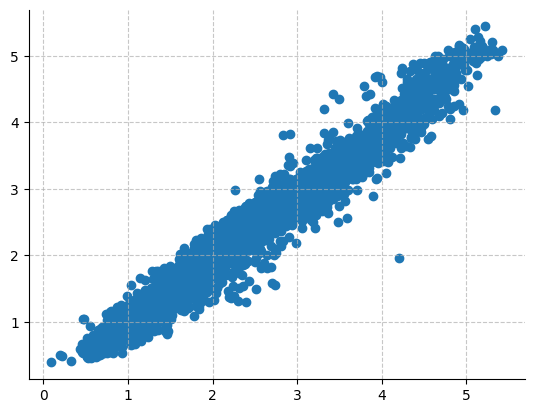

In [70]:
plt.scatter(predictions["MSE"],predictions["MAE"])
plt.grid(linestyle="--", alpha=0.7)

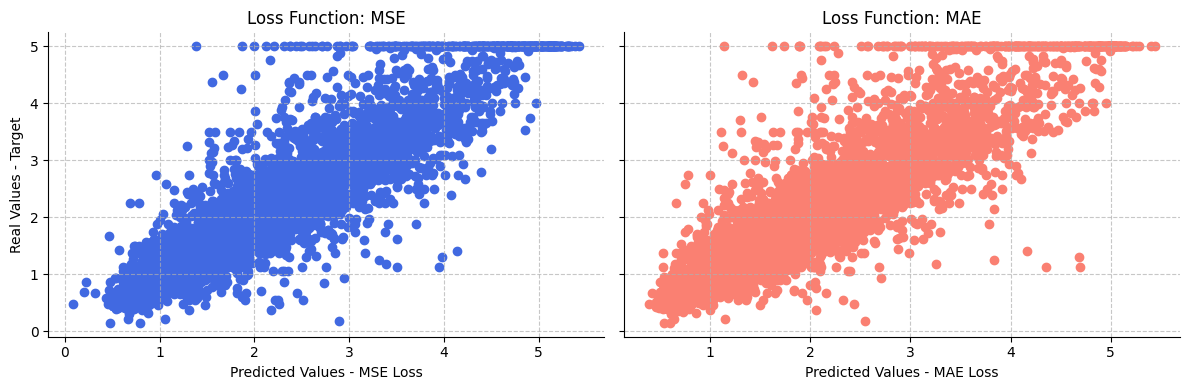

In [84]:
fig, axs = plt.subplots(1,2,figsize=(12,4),sharey=True)
axs[0].scatter(predictions["MSE"],y_test, color="royalblue")
axs[0].grid(linestyle="--", alpha=0.7)
axs[0].set_xlabel("Predicted Values - MSE Loss")
axs[0].set_ylabel("Real Values - Target")
axs[0].set_title("Loss Function: MSE")

axs[1].scatter(predictions["MAE"],y_test, color="salmon")
axs[1].grid(linestyle="--", alpha=0.7)
axs[1].set_xlabel("Predicted Values - MAE Loss")
axs[1].set_title("Loss Function: MAE")

plt.tight_layout()

**NOTES**

In this analysis no study on the features and target variables has been performed, although it would be necessary. Note, for instance the large number of properties vith a value set at "5" in the dataset that would require additional study.

## **2.0 CLASSIFICATION METRICS**

In [46]:
# make a synthetic dataset
X, y = make_circles(factor=0.5, n_samples=2000, random_state=0, noise=0.3)
X_t, X_test, y_t, y_test = train_test_split(X,y,test_size=0.3,random_state=48)

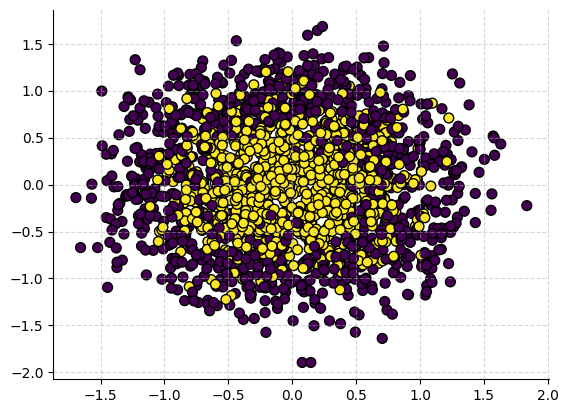

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
plt.grid(linestyle="--",alpha=0.5)

In [48]:
cv=sk.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1978)
param = {"max_depth":[4,5,6,7,8,9,10,11],"min_samples_split":[2,3,4,5,6,7,8],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}
tree = DecisionTreeClassifier(random_state=78)
grid = GridSearchCV(tree, param, scoring="accuracy",cv=cv)

In [49]:
grid.fit(X_t, y_t)

grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}

Hyperpar Opt Tree


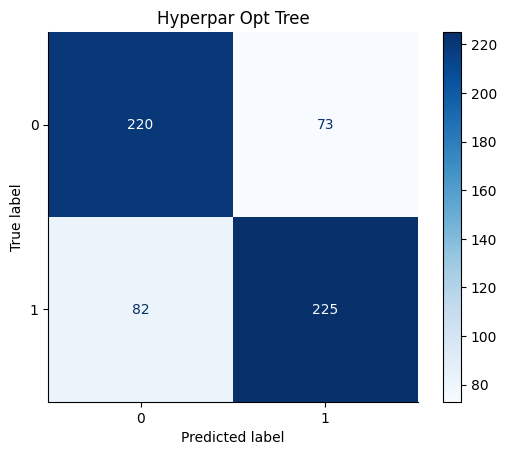

In [52]:
disp = ConfusionMatrixDisplay.from_estimator(
    grid,
    X_test,
    y_test,
    display_labels=[0,1],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Hyperpar Opt Tree")

print("Hyperpar Opt Tree")

* **Rows**: Represent the actual classes (what's truly happening).
* **Columns**: Represent the predicted classes (what your model thinks is happening).

Inside the table:

* True positives (TP): Correctly predicted positive cases. (Think of hitting a bullseye!)
* True negatives (TN): Correctly predicted negative cases. (You successfully avoided the wrong target.)
* False positives (FP): Incorrectly predicted positive cases. (False alarm! You thought it was positive, but it wasn't.)
* False negatives (FN): Incorrectly predicted negative cases. (Missed the mark! You thought it was negative, but it actually was positive.)

**Why is it useful?**

* Provides detailed insights: Unlike accuracy, which simply gives you an overall percentage of correct predictions, the confusion matrix shows you where your model is struggling. Are there specific classes it consistently misclassifies?
* Helps diagnose problems: You can analyze the distribution of TP, TN, FP, and FN to identify potential biases or weaknesses in your model.
* Provides metrics for evaluation: From the confusion matrix, you can calculate various performance metrics like precision, recall, F1 score, and specificity, giving you a deeper understanding of your model's strengths and weaknesses.